In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
import matplotlib.pyplot as plt

In [8]:
data = df.drop('Purchased', axis = 1)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [10]:
data_scaled = scaler.fit_transform(data)

print(data_scaled)

[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]
 [-1.01769239 -0.34481683]
 [-1.01769239  0.41866944]
 [-0.54012675  2.35674998]
 [-1.20871865 -1.07893824]
 [-0.25358736 -0.13926283]
 [-1.11320552  0.30121002]
 [-1.11320552 -0.52100597]
 [-1.6862843   0.47739916]
 [-0.54012675 -1.51941109]
 [-1.87731056  0.35993973]
 [-0.82666613  0.30121002]
 [ 0.89257019 -1.3138571 ]
 [ 0.70154394 -1.28449224]
 [ 0.79705706 -1.22576253]
 [ 0.98808332 -1.19639767]
 [ 0.70154394 -1.40195167]
 [ 0.89257019 -0.60910054]
 [ 0.98808332 -0.84401939]
 [ 0.70154394 -1.40195167]
 [ 0.79705706 -1.37258681]
 [ 0.89257019 -1.46068138]
 [ 1.08359645 -1.22576253]
 [ 0.89257019 -1.16703281]
 [-0.82666613 -0.78528968]
 [-0.63563988 -1.51941109]
 [-0.63563988  0.12502088]
 [-1.01769239  1.97500684]
 [-1.59077117 -1.5781408 ]
 [-0.92217926 -0.75592482]
 [-1.01769239  0.59485858]
 [-0.25358736 -1.25512738]
 [-0.44461362 -1.22576253]
 

In [11]:
x_train = data_scaled
y_train = df['Purchased'].values

m,n = x_train.shape

print(m,n)

y_train = np.expand_dims(y_train, axis = 1)
y_train.shape

400 2


(400, 1)

In [12]:
X = tf.placeholder(tf.float32, [None, n])
Y = tf.placeholder(tf.float32, [None, 1])

initializer = tf.initializers.he_normal()
W = tf.Variable(initializer(shape=(n,1), dtype=tf.float32))
b = tf.Variable(tf.zeros([1]))

In [13]:
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))

cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_hat, labels = Y)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
optimizer = tf.train.AdamOptimizer(learning_rate = 1e-3).minimize(cost)
init = tf.global_variables_initializer()

In [15]:
with tf.Session() as sess:
    sess.run(init)
    
    cost_history, accuracy_history = [],[]
    
    for epoch in range(1500):
        cost_per_epoch = 0
        
        sess.run(optimizer, feed_dict = {X:x_train, Y:y_train})
        
        c = sess.run(cost, feed_dict = {X : x_train, Y : y_train}) 
        
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y, 1))
        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
        
        cost_history.append(sum(sum(c))) 
        accuracy_history.append(accuracy.eval({X : x_train, Y : y_train}) * 100)
        
        if epoch % 100 == 0 and epoch != 0: 
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1]))
            
    Weight = sess.run(W) # Optimized Weight 
    Bias = sess.run(b)   # Optimized Bias 
    
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
    
    print("\nAccuracy:", accuracy_history[-1], "%")           

Epoch 100 Cost: 299.5700378417969
Epoch 200 Cost: 294.65289306640625
Epoch 300 Cost: 290.417236328125
Epoch 400 Cost: 286.7650451660156
Epoch 500 Cost: 283.60504150390625
Epoch 600 Cost: 280.8594055175781
Epoch 700 Cost: 278.4630432128906
Epoch 800 Cost: 276.3619079589844
Epoch 900 Cost: 274.51165771484375
Epoch 1000 Cost: 272.87542724609375
Epoch 1100 Cost: 271.4226989746094
Epoch 1200 Cost: 270.127197265625
Epoch 1300 Cost: 268.9677734375
Epoch 1400 Cost: 267.9256591796875

Accuracy: 100.0 %


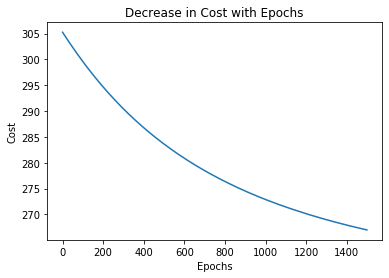

In [16]:
plt.plot(list(range(1500)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
  
plt.show() 

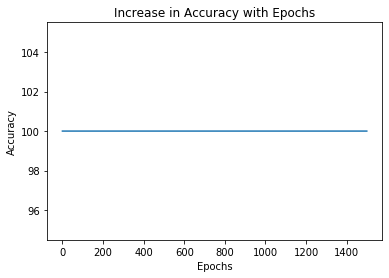

In [17]:
plt.plot(list(range(1500)), accuracy_history) 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Increase in Accuracy with Epochs') 
  
plt.show()